In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.dates as dt
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
fs = 20

In [3]:
st_bw = pd.HDFStore('../../data/raw/boothwise.h5')

In [4]:
bth_dlst = [int(k.split('mdb')[1]) for k in st_bw.keys()]

In [5]:
len(bth_dlst)

86

In [6]:
st_bw.close()

# Mappings

In [7]:
df_bthlst = pd.read_csv('../../data/essentials/md_paths_v3.csv', index_col=[0])
df_bthlst = df_bthlst[~df_bthlst["client_display_name"].isnull()]

In [8]:
df_bthlst.head()

,MD_id,client_display_name,path_mcu,path_temp,path_relay,path_door,path_amb
0,MotherDairy-89,Booth No. 601 | Rajouri Garden,/MotherDairy-89/Meter2/PowerBPhase,/MotherDairy-89/TemperatureSensor4/Temperature,/MotherDairy-89/Relay11/RemoteControl,/MotherDairy-89/ReedSensor15/Status,/MotherDairy-89/TemperatureSensor6/Temperature
1,MotherDairy-59,Booth No. 3 | Kailash Colony,/MotherDairy-59/Meter2/PowerBPhase,/MotherDairy-59/TemperatureSensor4/Temperature,/MotherDairy-59/Relay10/RemoteControl,/MotherDairy-59/ReedSensor15/Status,/MotherDairy-59/TemperatureSensor6/Temperature
2,MotherDairy-93,Booth No. 538 | Rohini,/MotherDairy-93/Meter2/PowerBPhase,/MotherDairy-93/TemperatureSensor4/Temperature,/MotherDairy-93/Relay10/RemoteControl,/MotherDairy-93/ReedSensor15/Status,/MotherDairy-93/TemperatureSensor6/Temperature
3,MotherDairy-119,Booth No. 656 | Pitampura,/MotherDairy-119/Meter2/PowerBPhase,/MotherDairy-119/TemperatureSensor100/Temperature,/MotherDairy-119/Relay11/RemoteControl,/MotherDairy-119/ReedSensor50/Status,NaN
4,MotherDairy-33,Booth No. 922 | Gurgaon,/MotherDairy-33/Meter2/PowerBPhase,/MotherDairy-33/TemperatureSensor4/Temperature,/MotherDairy-33/Relay10/RemoteControl,/MotherDairy-33/ReedSensor15/Status,/MotherDairy-33/TemperatureSensor5/Temperature


In [9]:
df_bthlst["booth_id"] = list(df_bthlst['client_display_name'\
                                      ].apply(lambda x: x.split("|")[0].split(".")[-1]).astype(int))
df_bthlst["md_id"] = list(df_bthlst['MD_id'].apply(lambda x: abs(int(x.split("MotherDairy")[1]))))

In [10]:
bthlst = list(df_bthlst[df_bthlst["md_id"].isin(bth_dlst)]["booth_id"])

# Ground Truth Information

In [11]:
df_gt = pd.read_excel('../../data/essentials/Report By Category.xls', index_col=[0])

In [12]:
df_gt.head()

,Request Status,Created Date,SLA Crossed,Priority,Request Type,Equipment Type,Equipment Sap Code,Equipment Serial No,Equipment Description,Category,...,Escalation Level 4,Escalation Level 4 SAP,Escalation Level 5,Escalation Level 5 SAP,Escalation Level PQ 1,Escalation Level PQ 1 SAP,Escalation Level PQ 2,Escalation Level PQ 2 SAP,Escalation Level PQ 3,Escalation Level PQ 3 SAP
Request No,,,,,,,,,,,,,,,,,,,,,
287522,Closed,2016-04-01 06:58:46.340,No,Critical,Equipment,DEEP FREEZER,PPG-F17210,1000111 Western Refrigeration Pvt Ltd,FREEZER 400L WITH STABILIZER,Refrigeration Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287523,Closed,2016-04-01 07:06:56.467,Yes,Critical,Equipment,MILK CHILLING UNIT,PPG-R962,1006122 Climatrol Corporation,MILK CHILLING UNIT WITH ACCESSORIES,Refrigeration Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287525,Closed,2016-04-01 07:14:15.020,No,Critical,Equipment,DEEP FREEZER,PPG-F23921,1000795 Frostco,FREEZER 330L GLASS TOP WITH ST,Refrigeration Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287527,Closed,2016-04-01 07:27:14.740,No,Critical,Equipment,VIZI COOLER,PPG-V2693,1000795 Frostco,VISI COOLER 310L PLS MNS 20L W,Refrigeration Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287532,Closed,2016-04-01 07:55:01.557,No,Critical,Equipment,DEEP FREEZER,PPG-F29573,1000795 Frostco,FREEZER 300L HT WITH STABLIZER,Refrigeration Equipment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_gt.columns

Index([u'Request Status', u'Created Date', u'SLA Crossed', u'Priority',
       u'Request Type', u'Equipment Type', u'Equipment Sap Code',
       u'Equipment   Serial No', u'Equipment Description', u'Category',
       u'SubCategory', u'Major Issue', u'Description', u'SKU',
       u'Product Batch Code', u'Processing Plant',
       u'Manufacturing / Production / Used By Date', u'Escalation Level',
       u'Assigned - Internal Entity', u'Escalation - Internal Entity',
       u'Assigned - External Entity', u'Escalation - External Entity',
       u'Sub Assigned', u'Ticket Number', u'Closure Comments By End User',
       u'End User Confirmation', u'End User Confirmation Datetime',
       u'Assigned Date', u'Sub Assigned Date', u'Escaltion Date', u'Due Date',
       u'Complete Date', u'Close Date', u'Requester Type', u'Requester Name',
       u'Requester Registered Phone No', u'Requester Calling No',
       u'Requester Alternate Phone No', u'Requester Email ID',
       u'Requester State ', u'R

In [14]:
df_gt[[u'Equipment Type', u'Equipment Sap Code']].head()

,Equipment Type,Equipment Sap Code
Request No,,
287522,DEEP FREEZER,PPG-F17210
287523,MILK CHILLING UNIT,PPG-R962
287525,DEEP FREEZER,PPG-F23921
287527,VIZI COOLER,PPG-V2693
287532,DEEP FREEZER,PPG-F29573


In [15]:
df_gt[u'Equipment Type'].value_counts()

DEEP FREEZER           18064
FREEZER ON WHEEL       14476
VIZI COOLER             7887
MILK CHILLING UNIT      4908
VERTICLE COOLER         2801
Chest Cooler            2039
Vertical Freezer          68
BEVERAGE DISPENSER        15
TRICYLE PUSHCART          10
MILK CHIILLING UNIT        9
Others                     4
Name: Equipment Type, dtype: int64

# Required Ground Truth

In [16]:
my_cols = [u'Request Status', u'Equipment Type', u'Created Date', u'Priority', u'Major Issue', u'Description', \
           u'Assigned Date', u'Sub Assigned Date', u'Escaltion Date', u'Due Date', u'Complete Date', \
           u'Close Date', u'Service Location', u'Repeated in last 48 hours', u'Resolution Code', \
           u'Replacement Item', u'Replacement Quantity', u'Resolution Description', u'Service Location Type', \
           u'Actual Close Datetime', u'Hold Date', u'Total Hold Time (In Minutes)', u'Reopen Count']

In [17]:
df_bug = df_gt[(df_gt[u'Service Location'].isin(bthlst)) & \
               (df_gt[u'Equipment Sap Code'].str.match('^PPG-R')) & \
               (df_gt[u'Request Status'] == 'Closed')][my_cols]

In [18]:
n_booths = len(bthlst)
n_faulty = df_bug[u'Service Location'].unique().size
n_fit = n_booths - n_faulty

print "Out of", n_booths, "booths", n_faulty, "had fault"

Out of 86 booths 85 had fault


In [19]:
print "Fit booths are: ", set(bthlst) ^ set(df_bug[u'Service Location'].unique())

Fit booths are:  set([763])


In [20]:
df_bug.head()

,Request Status,Equipment Type,Created Date,Priority,Major Issue,Description,Assigned Date,Sub Assigned Date,Escaltion Date,Due Date,...,Repeated in last 48 hours,Resolution Code,Replacement Item,Replacement Quantity,Resolution Description,Service Location Type,Actual Close Datetime,Hold Date,Total Hold Time (In Minutes),Reopen Count
Request No,,,,,,,,,,,,,,,,,,,,,
287537,Closed,MILK CHILLING UNIT,2016-04-01 08:09:14.463,Critical,MCU temp high,Shopkeeper complaint that his MCU is not cooli...,2016-04-01 08:09:14.853,NaN,NaT,2016-04-01 20:09:00,...,NO,Field Related,NaN,NaN,Ice malte by technician MCU working good,Milk Shop,2016-04-02 08:30:00,NaN,0,NaN
287912,Closed,MILK CHILLING UNIT,2016-04-01 17:15:29.810,Critical,MCU temp high,Shopkeeper complaint that his MCU is not cooling.,2016-04-01 17:15:30.220,NaN,2016-04-03 00:00:13.793,2016-04-07 15:15:00,...,NO,Field Related,NaN,NaN,Ice mallt by technician MCU working good,Milk Shop,2016-04-02 12:45:00,NaN,0,NaN
288009,Closed,MILK CHILLING UNIT,2016-04-02 08:03:46.887,Critical,MCU temp high,Shopkeeper complaint that his MCU is not cooli...,2016-04-02 08:03:47.223,NaN,2016-04-02 20:22:57.617,2016-04-03 14:03:00,...,NO,Field Related,NaN,NaN,Ice malte by technician MCU working good,Milk Shop,2016-04-02 12:45:00,NaN,0,NaN
288133,Closed,MILK CHILLING UNIT,2016-04-02 10:49:50.677,Critical,MCU temp high,Shopkeeper complaint that his MCU is not cooli...,2016-04-02 10:49:50.953,NaN,2016-04-02 23:06:10.020,2016-04-03 16:49:00,...,NO,Field Related,NaN,NaN,Starting capictor change MCU working good,Milk Shop,2016-04-04 09:30:00,NaN,0,NaN
288445,Closed,MILK CHILLING UNIT,2016-04-02 18:01:53.000,Critical,MCU temp high,\nShopkeeper complaint that his MCU is not co...,2016-04-02 18:01:53.297,NaN,NaT,2016-04-03 06:01:00,...,NO,Field Related,NaN,NaN,Contecat by harmeet,Milk Shop,2016-04-02 07:30:00,NaN,0,NaN


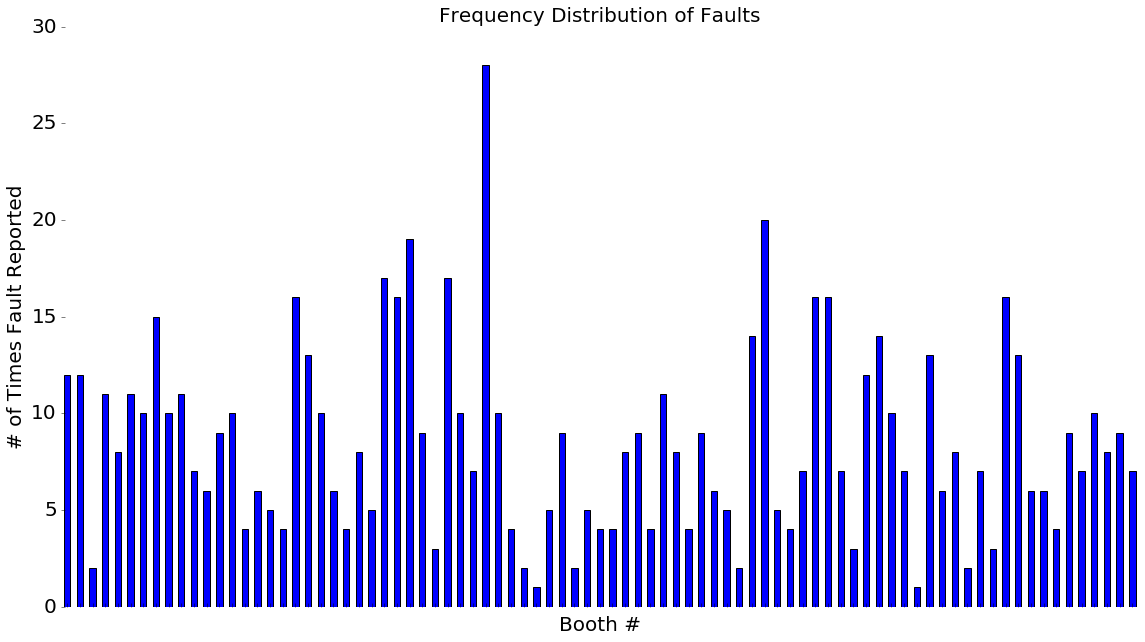

In [21]:
fig, ax = plt.subplots(figsize=(16, 9))

df_bugcount = df_bug[u'Service Location'].value_counts().sort_index()

df_bugcount.plot(kind='bar', ax=ax, fontsize=fs)

# x-axis
ax.set_xticklabels([])
ax.set_xlabel('Booth #', fontsize=20)

# y-axis
ax.set_ylabel('# of Times Fault Reported', fontsize=fs)

# plot attributes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

ax.set_title('Frequency Distribution of Faults', fontsize=fs)

plt.tight_layout()
plt.savefig('../../figures/raw/fault_frequency_dist.pdf')

# Understanding the Dates

In [22]:
date_cols = [u'Request Status', u'Created Date', u'Assigned Date', u'Sub Assigned Date', \
             u'Escaltion Date', u'Due Date', u'Complete Date', u'Close Date', u'Service Location', \
             u'Actual Close Datetime', u'Hold Date', u'Total Hold Time (In Minutes)', u'Reopen Count']

In [23]:
df_closed = df_bug[date_cols]
df_closed.head()

,Request Status,Created Date,Assigned Date,Sub Assigned Date,Escaltion Date,Due Date,Complete Date,Close Date,Service Location,Actual Close Datetime,Hold Date,Total Hold Time (In Minutes),Reopen Count
Request No,,,,,,,,,,,,,
287537,Closed,2016-04-01 08:09:14.463,2016-04-01 08:09:14.853,NaN,NaT,2016-04-01 20:09:00,2016-04-02 09:45:27.673,2016-04-02 14:42:13.420,744,2016-04-02 08:30:00,NaN,0,NaN
287912,Closed,2016-04-01 17:15:29.810,2016-04-01 17:15:30.220,NaN,2016-04-03 00:00:13.793,2016-04-07 15:15:00,2016-04-03 05:38:38.223,2016-04-03 06:49:01.713,99,2016-04-02 12:45:00,NaN,0,NaN
288009,Closed,2016-04-02 08:03:46.887,2016-04-02 08:03:47.223,NaN,2016-04-02 20:22:57.617,2016-04-03 14:03:00,2016-04-03 05:46:29.967,2016-04-03 06:48:51.507,956,2016-04-02 12:45:00,NaN,0,NaN
288133,Closed,2016-04-02 10:49:50.677,2016-04-02 10:49:50.953,NaN,2016-04-02 23:06:10.020,2016-04-03 16:49:00,2016-04-03 14:59:23.327,2016-04-03 15:25:20.007,853,2016-04-04 09:30:00,NaN,0,NaN
288445,Closed,2016-04-02 18:01:53.000,2016-04-02 18:01:53.297,NaN,NaT,2016-04-03 06:01:00,2016-04-03 06:04:21.127,2016-04-03 06:47:20.933,423,2016-04-02 07:30:00,NaN,0,NaN


In [24]:
# Missing Values
df_nullcount = df_closed.isnull().apply(np.count_nonzero)
print df_nullcount

Request Status                    0
Created Date                      0
Assigned Date                     0
Sub Assigned Date               703
Escaltion Date                  347
Due Date                          0
Complete Date                     0
Close Date                        0
Service Location                  0
Actual Close Datetime           536
Hold Date                       723
Total Hold Time (In Minutes)      0
Reopen Count                    681
dtype: int64


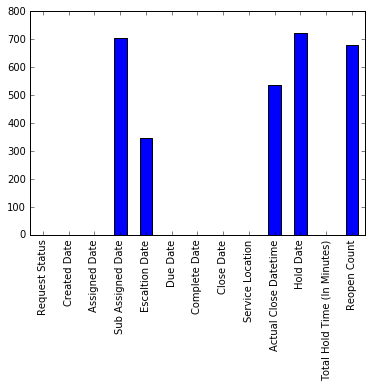

In [25]:
df_nullcount.plot(kind='bar')

# Gantt Chart of Faults

In [26]:
df_t1 = df_closed[[u'Created Date', u'Close Date', u'Service Location']].reset_index(drop=True)
df_t1.columns = ['Start', 'Finish', 'Task']

df_t1.head()

,Start,Finish,Task
0,2016-04-01 08:09:14.463,2016-04-02 14:42:13.420,744
1,2016-04-01 17:15:29.810,2016-04-03 06:49:01.713,99
2,2016-04-02 08:03:46.887,2016-04-03 06:48:51.507,956
3,2016-04-02 10:49:50.677,2016-04-03 15:25:20.007,853
4,2016-04-02 18:01:53.000,2016-04-03 06:47:20.933,423


In [27]:
print 'Number of booths which are analysed:', df_t1.Task.unique().size

Number of booths which are analysed: 85


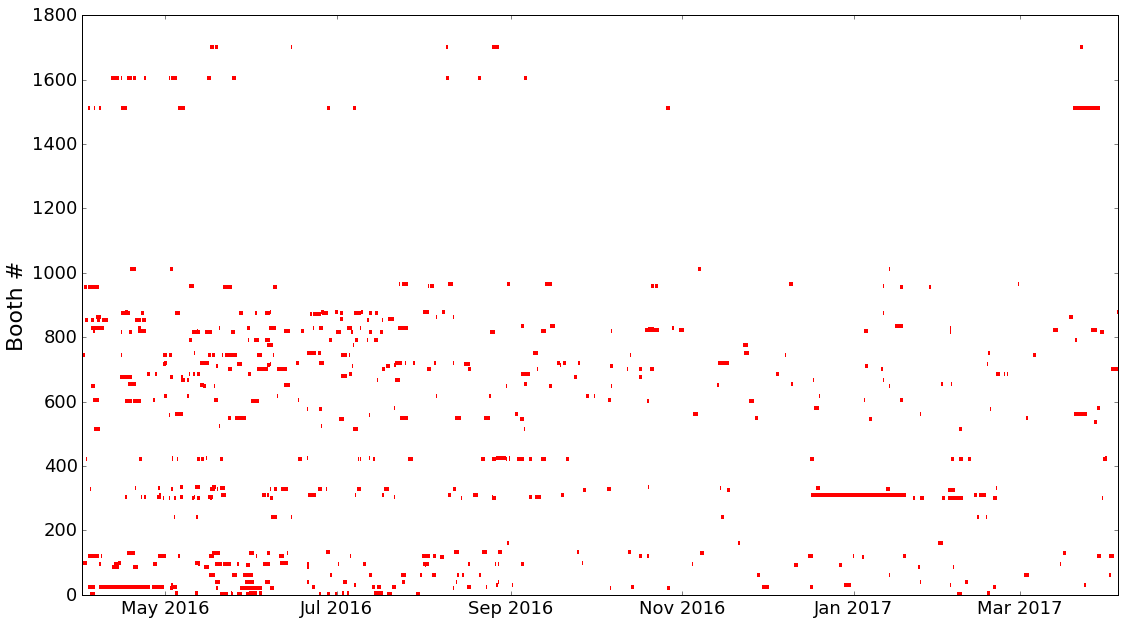

In [28]:
plt.rcParams.update({'font.size': fs-2})

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(111)
ax = ax.xaxis_date()
ax = plt.hlines(df_t1.Task, dt.date2num(pd.to_datetime(df_t1.Start).astype(datetime)), \
                dt.date2num(pd.to_datetime(df_t1.Finish).astype(datetime)), lw=4, color='red')

plt.ylabel('Booth #', fontsize=fs+2)
plt.tight_layout()

plt.savefig('../../figures/raw/fault_gc.pdf')

In [29]:
df_delta = df_t1["Finish"].sub(df_t1["Start"], axis=0)

In [30]:
df_t1["time_hrs"] = df_delta.apply(lambda td: td.total_seconds() / 3600)

[]

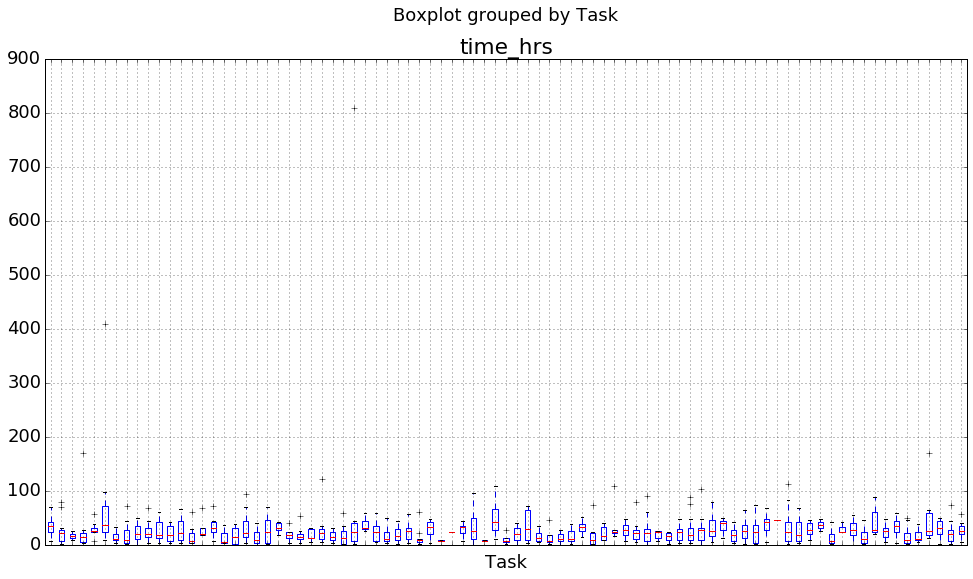

In [31]:
fig, ax = plt.subplots(figsize=(16, 9))
df_t1.boxplot(column='time_hrs', by='Task', ax=ax)

ax.set_xticklabels([])
#ax.set_ylim([0, 100])

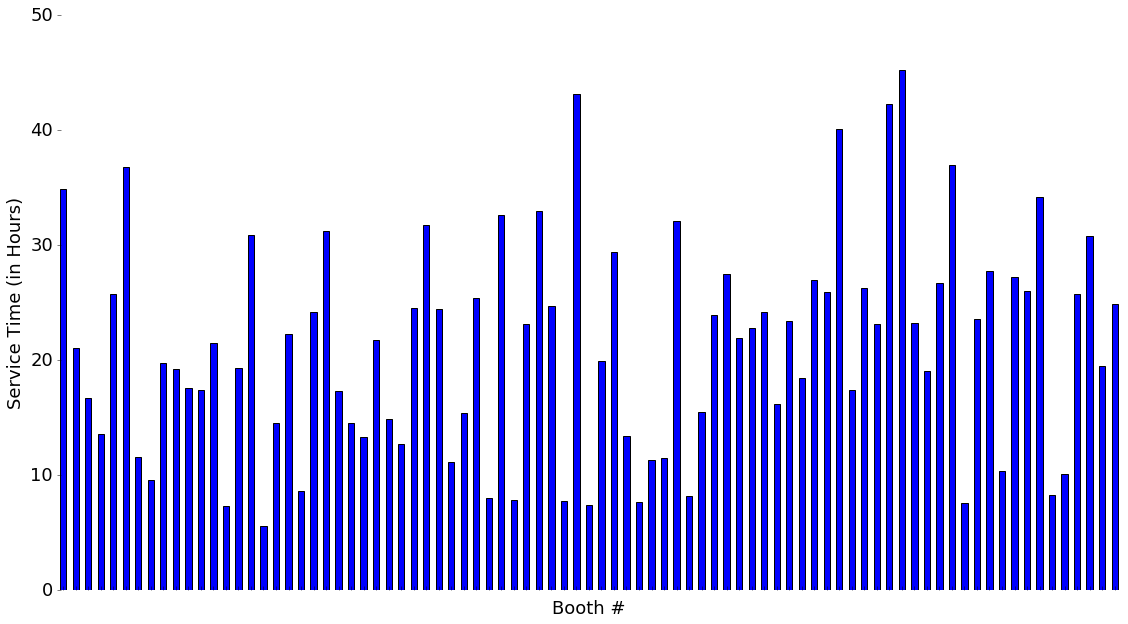

In [32]:
fig, ax = plt.subplots(figsize=(16, 9))

df_t1[['Task', 'time_hrs']].groupby('Task').median().plot(kind='bar', ax=ax, legend=False)

# x-axis
ax.set_xticklabels([])
ax.set_xlabel('Booth #')

# y-axis
ax.set_ylabel('Service Time (in Hours)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

plt.tight_layout()

# Generate Booth Report

In [33]:
df_bug[u'Service Location Type'].value_counts()

Milk Shop           683
MS DOUBLE SUPPLY     40
Name: Service Location Type, dtype: int64

In [34]:
bug_count = df_bug[u'Service Location'].value_counts()
mdid_lst = list(df_bthlst[df_bthlst["booth_id"].isin(bug_count.index.values)]["md_id"])

indx = ['mdb' + str(v) for v in mdid_lst]
df_selparams = pd.DataFrame(index=indx, columns=['n_faults', 'n_amb', 'n_door', 'n_relay', 'n_mcu', 'n_temp'])

In [35]:
df_selparams.head()

,n_faults,n_amb,n_door,n_relay,n_mcu,n_temp
mdb89,NaN,NaN,NaN,NaN,NaN,NaN
mdb59,NaN,NaN,NaN,NaN,NaN,NaN
mdb93,NaN,NaN,NaN,NaN,NaN,NaN
mdb119,NaN,NaN,NaN,NaN,NaN,NaN
mdb103,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
bug_count[423]

28

In [37]:
for i, r in bug_count.iteritems():
    
    md_id = 'mdb' + str(df_bthlst[df_bthlst["booth_id"]==i]["md_id"].values[0])
    df_selparams.loc[md_id, 'n_faults'] = bug_count[i]

In [38]:
df_selparams.head()

,n_faults,n_amb,n_door,n_relay,n_mcu,n_temp
mdb89,8,NaN,NaN,NaN,NaN,NaN
mdb59,12,NaN,NaN,NaN,NaN,NaN
mdb93,1,NaN,NaN,NaN,NaN,NaN
mdb119,9,NaN,NaN,NaN,NaN,NaN
mdb103,13,NaN,NaN,NaN,NaN,NaN


In [39]:
st_streams = pd.HDFStore('../../data/raw/streams.h5')

In [40]:
st_streams

<class 'pandas.io.pytables.HDFStore'>
File path: ../../data/raw/streams.h5
/streams/amb              frame        (shape->[1074241,68])
/streams/door             frame        (shape->[1074241,86])
/streams/mcu              frame        (shape->[1074241,86])
/streams/relay            frame        (shape->[1074241,86])
/streams/temp             frame        (shape->[1074241,86])

In [41]:
td_amb = st_streams['/streams/amb'].index.values[-1] - st_streams['/streams/amb'].index.values[0]
td_door = st_streams['/streams/door'].index.values[-1] - st_streams['/streams/door'].index.values[0]
td_mcu = st_streams['/streams/mcu'].index.values[-1] - st_streams['/streams/mcu'].index.values[0]
td_relay = st_streams['/streams/relay'].index.values[-1] - st_streams['/streams/relay'].index.values[0]
td_temp = st_streams['/streams/temp'].index.values[-1] - st_streams['/streams/temp'].index.values[0]

In [42]:
namb_instance = td_amb / np.timedelta64(30, 's')
ndoor_instance = td_door / np.timedelta64(30, 's')
nmcu_instance = td_mcu / np.timedelta64(30, 's')
nrelay_instance = td_relay / np.timedelta64(30, 's')
ntemp_instance = td_temp / np.timedelta64(30, 's')

In [43]:
df_namb = (st_streams['/streams/amb'].count() * 100.0) / namb_instance
df_ndoor = (st_streams['/streams/door'].count() * 100.0) / ndoor_instance
df_nmcu = (st_streams['/streams/mcu'].count() * 100.0) / nmcu_instance
df_nrelay = (st_streams['/streams/relay'].count() * 100.0) / nrelay_instance
df_ntemp = (st_streams['/streams/temp'].count() * 100.0) / ntemp_instance

In [44]:
st_streams.close()

In [45]:
df_namb = df_namb[df_namb.index != 'mdb68']
df_ndoor = df_ndoor[df_ndoor.index != 'mdb68']
df_nmcu = df_nmcu[df_nmcu.index != 'mdb68']
df_nrelay = df_nrelay[df_nrelay.index != 'mdb68']
df_ntemp = df_ntemp[df_ntemp.index != 'mdb68']

In [46]:
df_selparams.loc[df_namb.index, 'n_amb'] = df_namb.values
df_selparams.loc[df_ndoor.index, 'n_door'] = df_ndoor.values
df_selparams.loc[df_nmcu.index, 'n_mcu'] = df_nmcu.values
df_selparams.loc[df_nrelay.index, 'n_relay'] = df_nrelay.values
df_selparams.loc[df_ntemp.index, 'n_temp'] = df_ntemp.values

In [47]:
df_selparams.head()

,n_faults,n_amb,n_door,n_relay,n_mcu,n_temp
mdb89,8,40.9896,62.1635,53.3418,26.7974,34.0059
mdb59,12,34.9148,49.5248,50.2641,35.1147,34.9266
mdb93,1,36.6568,59.3619,59.3473,36.8216,36.6655
mdb119,9,NaN,7.52625,4.07693,4.08214,5.86461
mdb103,13,NaN,15.1468,15.1441,15.1464,15.1292


In [48]:
df_selparams.to_csv('../../data/raw/booth_sc.csv')

# Categorize Booth

In [49]:
# Drop booths with missing information
df_wna = df_selparams.dropna()

In [50]:
df_wna.sort_values(by='n_faults').head(24)

,n_faults,n_amb,n_door,n_relay,n_mcu,n_temp
mdb93,1,36.6568,59.3619,59.3473,36.8216,36.6655
mdb55,2,24.3685,51.4481,51.8886,24.3895,24.3678
mdb98,2,34.5526,63.5273,63.6502,35.064,34.5737
mdb63,2,39.2045,63.9232,63.9167,39.2326,39.2117
mdb21,3,52.9573,74.2124,74.1896,52.9847,52.9768
mdb75,3,42.3847,61.2941,61.2455,43.2586,42.3898
mdb71,4,29.4847,57.1694,57.2446,35.7033,35.6822
mdb82,4,32.8851,62.0116,62.2943,40.4242,32.8865
mdb61,4,29.2785,56.9255,55.8568,29.2904,29.2776
mdb92,4,38.9181,62.9776,62.9765,40.3178,38.9536


# Booths to Begin With

In [52]:
df_wna.sort_values(by='n_faults')[['n_amb', 'n_mcu', 'n_temp'\
                                  ]].median(axis=1).head(24).sort_values(ascending=False)

mdb21     52.976802
mdb18     50.115151
mdb36     44.361037
mdb75     42.389783
mdb84     40.883415
mdb100    39.303135
mdb63     39.211722
mdb92     38.953586
mdb42     37.357853
mdb52     36.675789
mdb93     36.665550
mdb70     36.274389
mdb71     35.682157
mdb98     34.573745
mdb80     33.824844
mdb82     32.886506
mdb96     31.093052
mdb61     29.278467
mdb45     28.309037
mdb97     28.120718
mdb78     25.216525
mdb55     24.368484
mdb83     22.889671
mdb54     22.211982
dtype: float64

# Check Booth

In [56]:
df_bug[df_bug[u'Service Location'] == 99][['Created Date', 'Close Date']]

,Created Date,Close Date
Request No,,
287912,2016-04-01 17:15:29.810,2016-04-03 06:49:01.713
293930,2016-04-14 10:44:56.927,2016-04-15 10:47:05.823
306824,2016-05-11 17:05:39.237,2016-05-13 13:24:18.670
321419,2016-06-10 18:06:39.520,2016-06-13 18:21:22.850
321515,2016-06-11 08:26:39.067,2016-06-12 08:34:15.250
362596,2016-09-26 07:01:30.993,2016-09-26 14:23:37.590
